In [1]:
import sklearn
import pandas as pd
import numpy as np
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

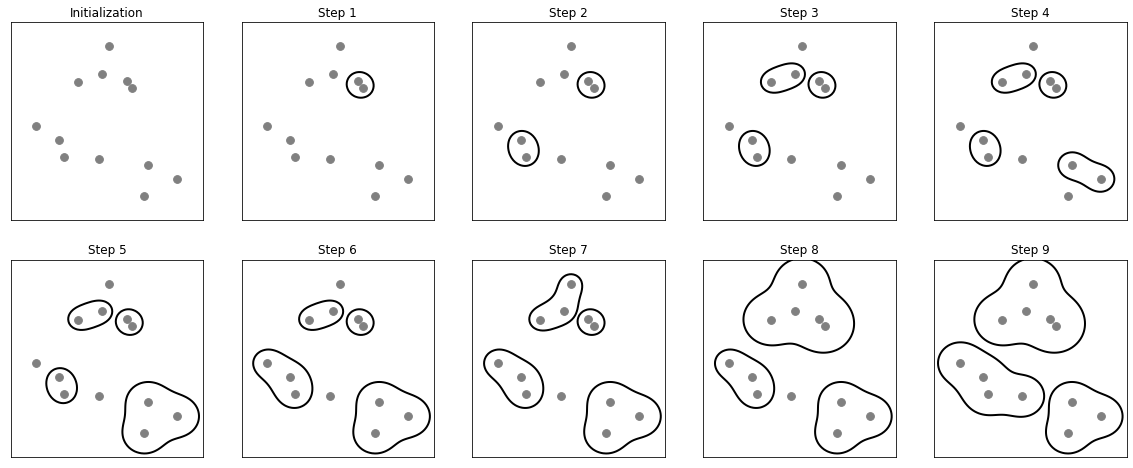

In [2]:
mglearn.plots.plot_agglomerative_algorithm()

Text(0, 0.5, 'Feature 1')

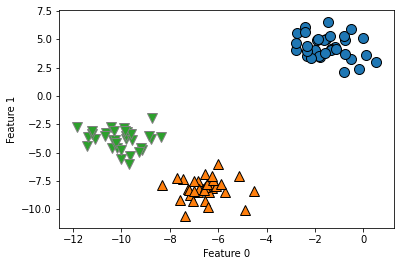

In [3]:
from sklearn.cluster import AgglomerativeClustering
X,y=make_blobs(random_state=1)
agg=AgglomerativeClustering(n_clusters=3)
assignment=agg.fit_predict(X)
mglearn.discrete_scatter(X[:,0],X[:,1],assignment)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

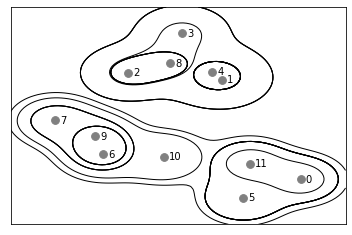

In [4]:
mglearn.plots.plot_agglomerative()

Text(0, 0.5, 'Cluster distance')

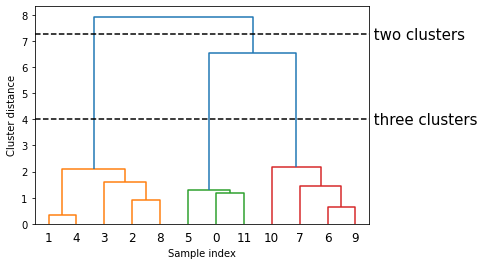

In [5]:
from scipy.cluster.hierarchy import dendrogram,ward
X,y=make_blobs(random_state=0,n_samples=12)
linkage_array=ward(X)
dendrogram(linkage_array)
ax=plt.gca()
bounds=ax.get_xbound()
ax.plot(bounds,[7.25,7.25],'--',c="k")
ax.plot(bounds,[4,4],'--',c="k")
ax.text(bounds[1],7.25,' two clusters', va="center",fontdict={"size":15})
ax.text(bounds[1],4,' three clusters', va="center",fontdict={"size":15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

In [6]:
from sklearn.cluster import DBSCAN
X,y=make_blobs(random_state=0,n_samples=12)
dbscan=DBSCAN()
clusters=dbscan.fit_predict(X)
print(f"Cluster memberships:\n{clusters}")

Cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


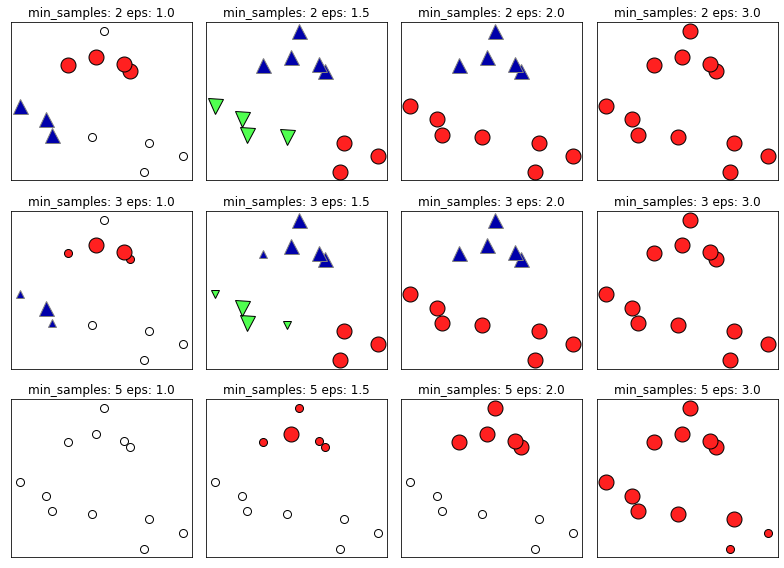

In [7]:
mglearn.plots.plot_dbscan()

Text(0, 0.5, 'Feature 1')

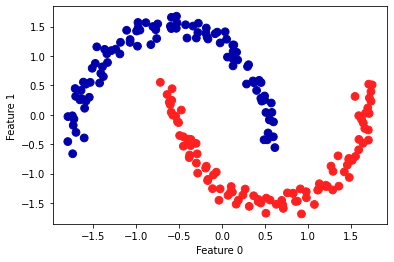

In [8]:
X,y=make_moons(n_samples=200,noise=0.05, random_state=0)
scaler=StandardScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)
dbscan=DBSCAN()
clusters=dbscan.fit_predict(X_scaled)

plt.scatter(X_scaled[:,0],X_scaled[:,1],c=clusters,cmap=mglearn.cm2,s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

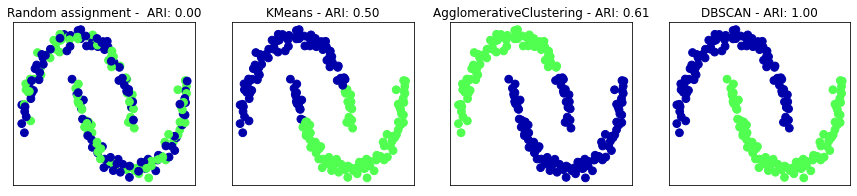

In [9]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import KMeans
X,y=make_moons(n_samples=200,noise=0.05, random_state=0)
scaler=StandardScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)
fig,axes=plt.subplots(1,4,figsize=(15,3),
                     subplot_kw={"xticks":(),"yticks":()})

algorithms=[KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]
random_state=np.random.RandomState(seed=0)
random_clusters=random_state.randint(low=0,high=2,size=len(X))
axes[0].scatter(X_scaled[:,0],X_scaled[:,1],c=random_clusters,cmap=mglearn.cm3,s=60)
axes[0].set_title("Random assignment -  ARI: {:.2f}".format(adjusted_rand_score(y,random_clusters)))
for ax, algorithm in zip(axes[1:],algorithms):
    clusters=algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0],X_scaled[:,1],c=clusters,cmap=mglearn.cm3,s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,adjusted_rand_score(y,clusters)))

In [10]:
#to jest bład bo nie powinno sie uzwyac accuracy_score na clustering
from sklearn.metrics import accuracy_score

clusters1=[0,0,1,1,0]
clusters2=[1,1,0,0,1]
print(f"Accuracy: {accuracy_score(clusters1,clusters2)}")
print(f"ARI: {adjusted_rand_score(clusters1,clusters2)}")

Accuracy: 0.0
ARI: 1.0


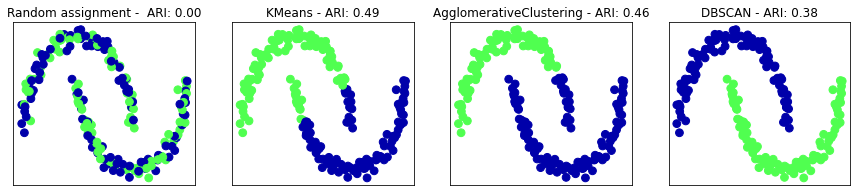

In [11]:
# silhouette score nie jest za dobry
from sklearn.metrics.cluster import silhouette_score
X,y=make_moons(n_samples=200,noise=0.05, random_state=0)
scaler=StandardScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)
fig,axes=plt.subplots(1,4,figsize=(15,3),
                     subplot_kw={"xticks":(),"yticks":()})

algorithms=[KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]
random_state=np.random.RandomState(seed=0)
random_clusters=random_state.randint(low=0,high=2,size=len(X))
axes[0].scatter(X_scaled[:,0],X_scaled[:,1],c=random_clusters,cmap=mglearn.cm3,s=60)
axes[0].set_title("Random assignment -  ARI: {:.2f}".format(adjusted_rand_score(y,random_clusters)))
for ax, algorithm in zip(axes[1:],algorithms):
    clusters=algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0],X_scaled[:,1],c=clusters,cmap=mglearn.cm3,s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           silhouette_score(X_scaled,clusters)))


In [12]:
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people

people=fetch_lfw_people(min_faces_per_person=20,resize=0.7)
image_shape=people.images[0].shape

mask=np.zeros(people.target.shape,dtype="bool")
for target in np.unique(people.target):
    mask[np.where(people.target==target)[0][:50]]=1

X_people=people.data[mask]
y_people=people.target[mask]

X_people=X_people/255

pca=PCA(n_components=100,whiten=True,random_state=0)
pca.fit(X_people)
X_pca=pca.transform(X_people)

In [13]:
dbscan=DBSCAN()
labels=dbscan.fit_predict(X_pca)
print(f"Unique labels: {np.unique(labels)}")

Unique labels: [-1]


In [14]:
dbscan=DBSCAN(min_samples=3)
labels=dbscan.fit_predict(X_pca)
print(f"Unique labels: {np.unique(labels)}")

Unique labels: [-1]


In [15]:
dbscan=DBSCAN(min_samples=3,eps=15)
labels=dbscan.fit_predict(X_pca)
print(f"Unique labels: {np.unique(labels)}")
print(f"Number of points per cluster: {np.bincount(labels+1)}")

Unique labels: [-1  0]
Number of points per cluster: [  32 2031]


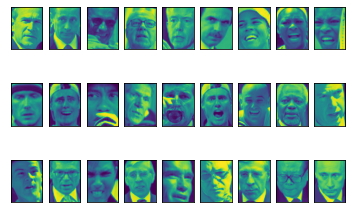

In [16]:
noise=X_people[labels==-1]
fig,axes=plt.subplots(3,9,subplot_kw={"xticks":(),"yticks":()})

for image,ax in zip(noise,axes.ravel()):
    ax.imshow(image.reshape(image_shape),vmin=0,vmax=1)

In [17]:
for eps in [1,2,3,5,7,9,11,13]:
    print(f"neps={eps}")
    dbscan=DBSCAN(eps=eps,min_samples=3)
    labels=dbscan.fit_predict(X_pca)
    print(f"Clusters present: {np.unique(labels)}")
    print(f"Cluster sizes: {np.bincount(labels+1)}")

neps=1
Clusters present: [-1]
Cluster sizes: [2063]
neps=2
Clusters present: [-1]
Cluster sizes: [2063]
neps=3
Clusters present: [-1]
Cluster sizes: [2063]
neps=5
Clusters present: [-1]
Cluster sizes: [2063]
neps=7
Clusters present: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12]
Cluster sizes: [2004    3   14    7    4    3    3    4    4    3    3    5    3    3]
neps=9
Clusters present: [-1  0  1  2]
Cluster sizes: [1307  750    3    3]
neps=11
Clusters present: [-1  0]
Cluster sizes: [ 413 1650]
neps=13
Clusters present: [-1  0]
Cluster sizes: [ 120 1943]


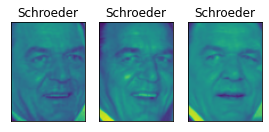

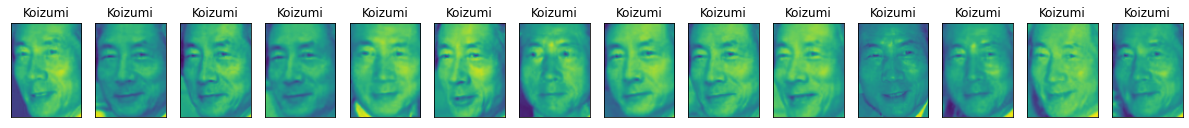

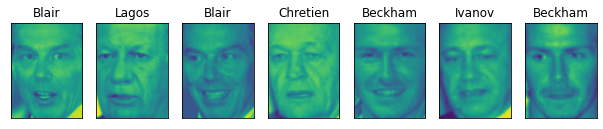

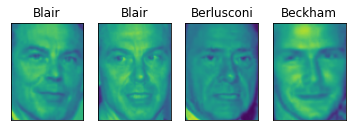

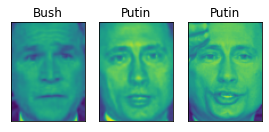

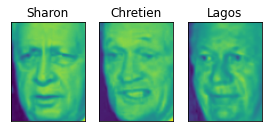

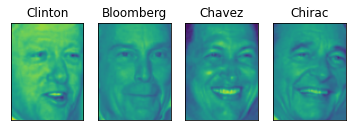

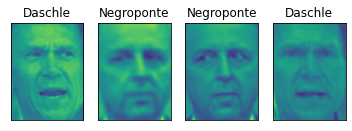

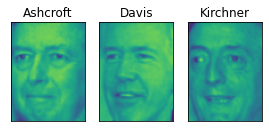

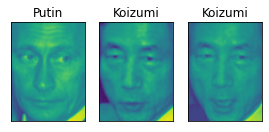

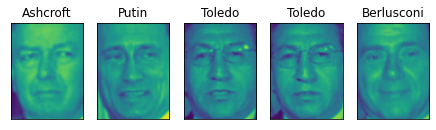

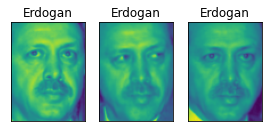

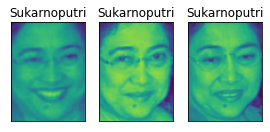

In [18]:
dbscan=DBSCAN(min_samples=3,eps=7)
labels=dbscan.fit_predict(X_pca)
for cluster in range(max(labels)+1):
    mask=labels==cluster
    n_images=np.sum(mask)
    fig,axes=plt.subplots(1,n_images,figsize=(n_images*1.5,4),
                         subplot_kw={"xticks":(),"yticks":()})
    for image,label,ax in zip(X_people[mask],y_people[mask],axes):
        ax.imshow(image.reshape(image_shape),vmin=0,vmax=1)
        ax.set_title(people.target_names[label].split()[-1])

In [19]:
km=KMeans(n_clusters=10,random_state=0)
labels_km=km.fit_predict(X_pca)
print(f"Cluster sizes k-means: {np.bincount(labels_km)}")

Cluster sizes k-means: [280 226 104 268 152 326 203 208 207  89]


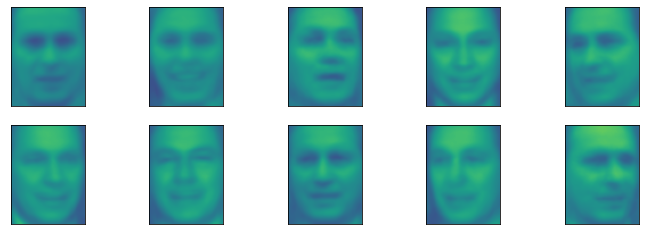

In [22]:
fig,axes=plt.subplots(2,5,subplot_kw={"xticks":(),"yticks":()},figsize=(12,4))
for center,ax in zip(km.cluster_centers_,axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape),vmin=0,vmax=1)

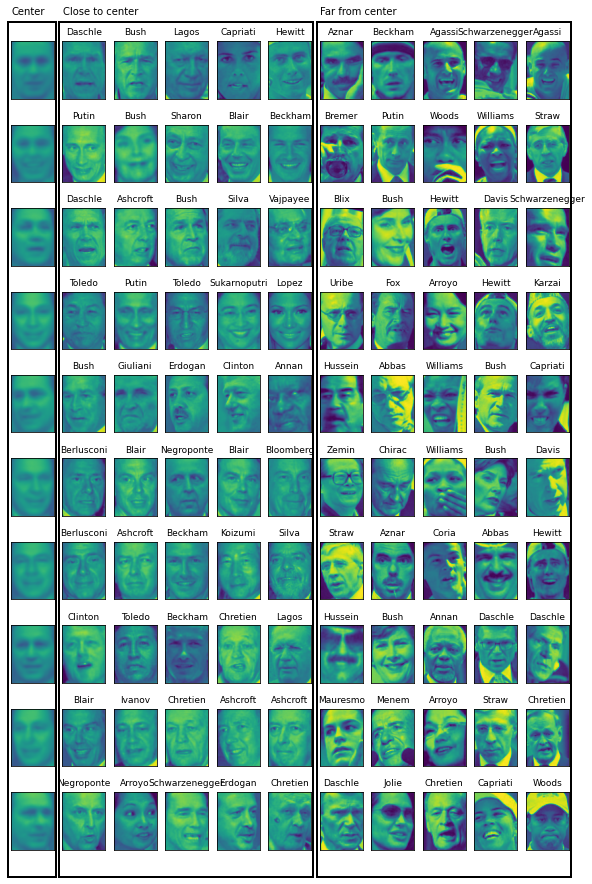

In [23]:
mglearn.plots.plot_kmeans_faces(km,pca,X_pca,X_people,y_people,people.target_names)

In [24]:
agglomerative=AgglomerativeClustering(n_clusters=10)
labels_agg=agglomerative.fit_predict(X_pca)
print(f"Cluster sizes agglomerative clustering: {np.bincount(labels_agg)}")

Cluster sizes agglomerative clustering: [169 660 144 329 217  85  18 261  31 149]


In [25]:
print("ARI: {:.2f}".format(adjusted_rand_score(labels_agg,labels_km)))

ARI: 0.10


Text(0, 0.5, 'Cluster distance')

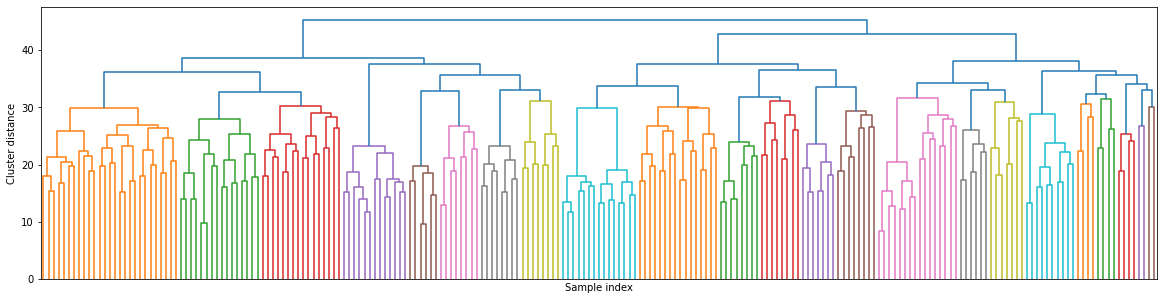

In [26]:
linkage_array=ward(X_pca)
plt.figure(figsize=(20,5))
dendrogram(linkage_array,p=7,truncate_mode="level",no_labels=True)
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

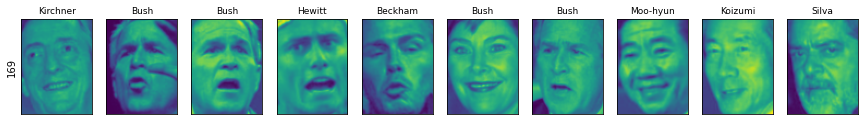

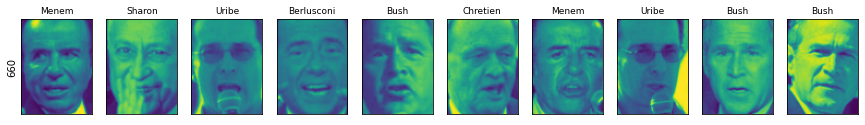

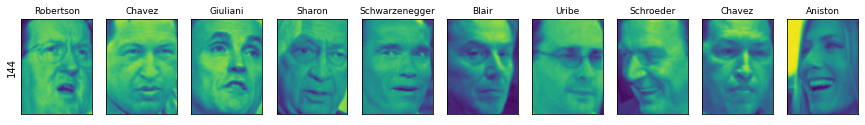

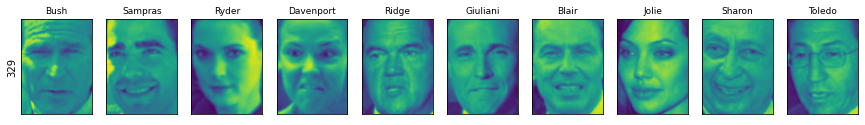

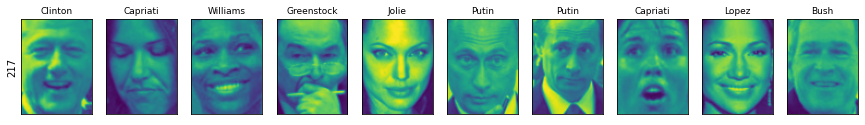

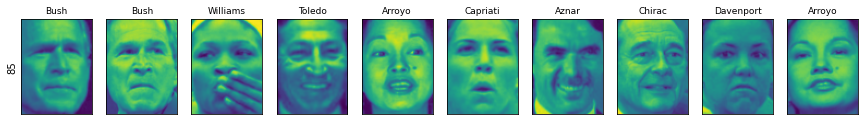

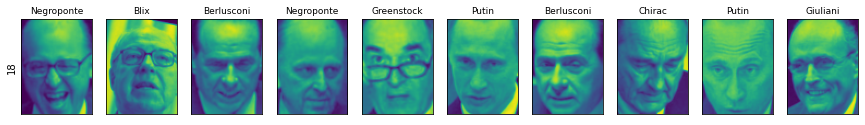

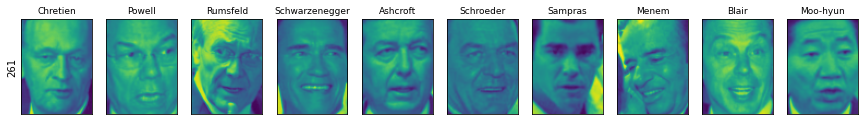

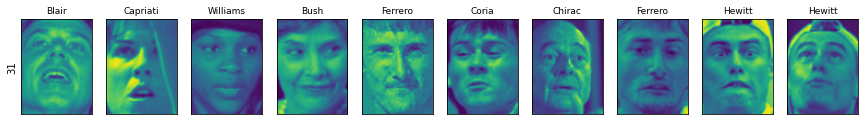

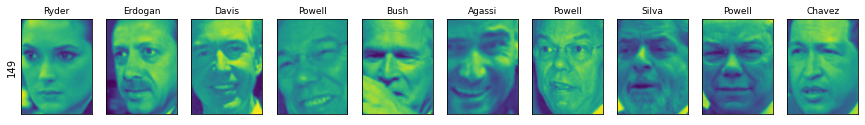

In [27]:
n_clusters=10
for cluster in range(n_clusters):
    mask=labels_agg==cluster
    fig,axes=plt.subplots(1,10,subplot_kw={"xticks":(),"yticks":()},figsize=(15,8))
    axes[0].set_ylabel(np.sum(mask))
    for image,label,asdf,ax in zip(X_people[mask],y_people[mask],labels_agg[mask],axes):
        ax.imshow(image.reshape(image_shape),vmin=0,vmax=1)
        ax.set_title(people.target_names[label].split()[-1],fontdict={"fontsize":9})

Cluster sizes agglomerative clustering: [ 43 120 100 194  56  58 127  22   6  37  65  49  84  18 168  44  47  31
  78  30 166  20  57  14  11  29  23   5   8  84  67  30  57  16  22  12
  29   2  26   8]


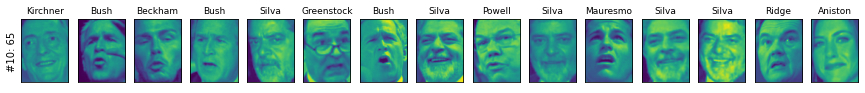

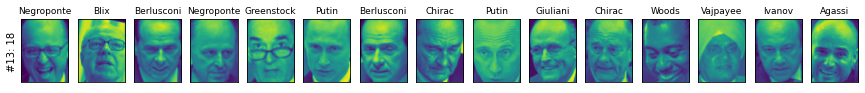

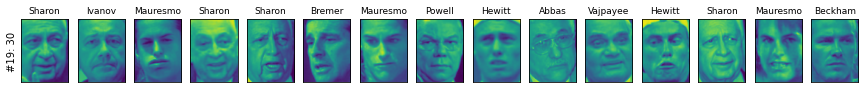

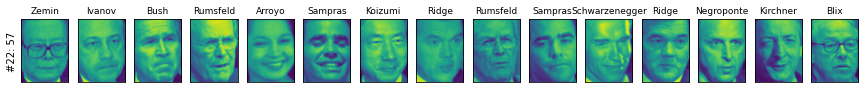

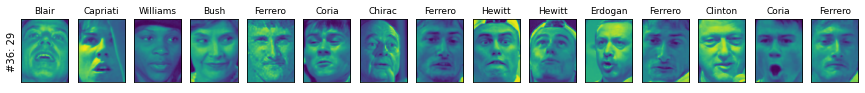

In [32]:
agglomerative=AgglomerativeClustering(n_clusters=40)
labels_agg=agglomerative.fit_predict(X_pca)
print(f"Cluster sizes agglomerative clustering: {np.bincount(labels_agg)}")

n_clusters=40
for cluster in [10,13,19,22,36]:
    mask=labels_agg==cluster
    fig,axes=plt.subplots(1,15,subplot_kw={"xticks":(),"yticks":()},figsize=(15,8))
    cluster_size=np.sum(mask)
    axes[0].set_ylabel("#{}: {}".format(cluster,cluster_size))         
    for image,label,asdf,ax in zip(X_people[mask],y_people[mask],labels_agg[mask],axes):
        ax.imshow(image.reshape(image_shape),vmin=0,vmax=1)
        ax.set_title(people.target_names[label].split()[-1],fontdict={"fontsize":9})
    for i in range(cluster_size,15):
        axes[i].set_visible(False)
